# Pràctica 3: Cas Kaggle

## Detalls del Jupyter Notebook

<b>Autor:</b> Rubén Ramos Segarra<br/>
<b>NIU:</b> 1496796<br/>
<b>Assignatura:</b> Aprenentatge Computacional (102787)<br/>
<b>Curs:</b> 2022-23<br/>
<b>Grau:</b> Enginyeria Informàtica<br/>
<b>Centre:</b> Escola d'Enginyeria (UAB)<br/>
<b>Nom del dataset:</b> (LoL) League of Legends Ranked Games (Enllaç: https://www.kaggle.com/datasets/datasnaek/league-of-legends?resource=download)<br/>
<b>GitHub:</b> (TBD)<br/>

## Definició del problema

A continuació es mostra la descipció del dataset de Kaggle corresponent:

> ### Sobre el conjunt de dades<br/>
> <b>Informació general</b><br/><br/>
> Aquesta és una col·lecció de més de 50.000 partides del videojoc League of Legends, així com fitxers .json que contenen un mètode per convertir entre els ID d'encanteris de campió i invocador i els seus noms. Per a cada partida, hi ha atributs per a:
> <ul>
    > <li>ID de la partida.</li>
    > <li>Temps de creació (en format Epoch).</li>
    > <li>Durada de la partida (en segons).</li>
    > <li>ID de temporada.</li>
    > <li>Guanyador (1 = team1, 2 = team2).</li>
    > <li>Primer baró, drac, torre, sang, inhibidor i Rift Herald (1 = team1, 2 = team2, 0 = none).</li>
    > <li>Campions i encanteris d'invocador per a cada equip (emmagatzemats com a identificadors d'encanteris de campió i invocador de Riot).</li>
    > <li>El nombre d'assassinats de torre, inhibidor, baró, drac i Rift Herald que té cada equip.</li>
    > <li>Les 5 sancions de cada equip (de nou, s'utilitzen identificacions de campió).</li>
> </ul>
> Aquest conjunt de dades es va recopilar mitjançant l'API de Riot Games, que facilita la cerca i la recopilació d'informació sobre l'historial de classificació dels usuaris i la recopilació de les seves partides. No obstant això, trobar una llista de noms d'usuari és la part difícil, en aquest cas estic fent servir una llista de noms d'usuari extrets de pàgines <em>third party</em>.<br/><br/>
> <b>Possibles usos</b><br/><br/>
> Hi ha una gran quantitat de dades en una sola partida de LoL. Aquest conjunt de dades pren la informació més rellevant i la facilita fàcilment per utilitzar-la en coses com ara intentar predir el resultat d'una partida de LoL, analitzar quins esdeveniments de la partida tenen més probabilitats de conduir a la victòria, entendre l'impacte que prohibeix un campió específic té, i més.

Com es pot comprovar en l'últim paràgraf no s'especifica cap atribut objectiu, sinò que es proposa amb quina finalitat es pot fer servir el dataset.

## Recollida de dades

En aquest cas les dades s'han recollit directament d'un dataset de Kaggle en format .csv, juntament amb uns fitxers de support addicionals en format .json. L'autor d'aquest dataset també indica que l'obtenció d'alguna d'aquestes dades ha estat costosa i que ha hagut de recòrrer a pàgines *third party* per extreure més informació, de la qual no se n'especifica la font d'origen.

## Exploració i visualització de dades

Per començar cal analitzar les dades que ens proporciona el dataset, amb l'objectiu de trobar patrons, relacions o anomalies entre aquestes. Inicialitzem el dataset.

In [185]:
import pandas as pd

dataset = pd.read_csv('games.csv', header=0, delimiter=',')
dataset.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


Aplicant un EDA (Exploratory Data Analysis) obtenim la següent informació pel que fa a la quantitat de mostres, les etiquetes dels atributs i el tipus de dades que conté.

In [186]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

Podem observar que el dataset conté un total de 51490 mostres i 61 atributs, dels quals tots son de tipus enter i no nuls. Si mirem la informació del Kaggle aquesta inicialment es pot associar de la següent manera:</br>
* `gameId` a l'ID de la partida.
* `creationTime` al temps de creació.
* `gameDuration` a la durada de la partida.
* `seasonID` a l'ID de temporada.
* `winner` al guanyador.
* `firstBaron`, `firstDragon`, `firstTower`, `firstBlood`, `firstInhibitor` i `firstRiftHerald` al primer baró, drac, torre, sang, inhibidor i Rift Herald.
* `t1_champ1id`,  `t1_champ1_sum1`, `t1_champ1_sum2`, [...], `t1_champ5id`, `t1_champ5_sum1`, `t1_champ5_sum2` i `t2_champ1id`,  `t2_champ1_sum1`, `t2_champ1_sum2`, [...], `t2_champ5id`, `t2_champ5_sum1`, `t2_champ5_sum2` als campions i encanteris d'invocador per a cada equip.
* `t1_towerKills`, `t1_inhibitorKills`, `t1_baronKills`, `t1_dragonKills`, `t1_riftHeraldKills` i `t2_towerKills`, `t2_inhibitorKills`, `t2_baronKills`, `t2_dragonKills`, `t2_riftHeraldKills` al nombre d'assassinats de torre, inhibidor, baró, drac i Rift Herald que té cada equip.
* `t1_ban1`, [...], `t1_ban5` i `t2_ban1`, [...], `t2_ban5` a les 5 sancions de cada equip.

A continuació obtenim el resum estadístic de les diferents característiques del dataset.

In [187]:
dataset.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


A sota es mostra la matriu de correlació de tots els atributs.

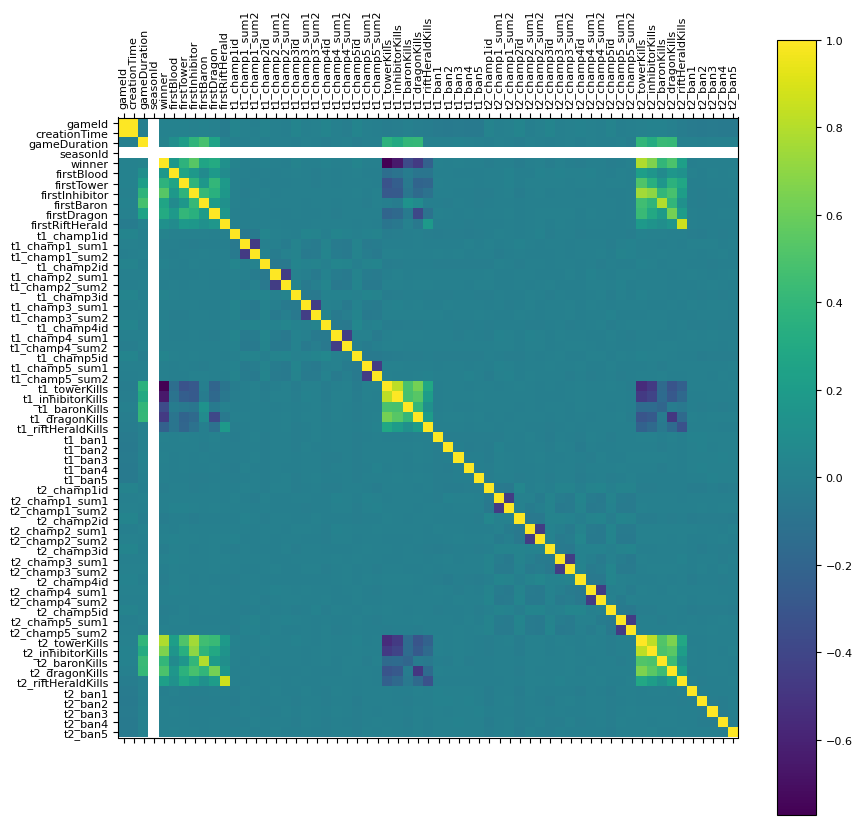

In [188]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 8})
plt.matshow(dataset.corr(), fignum=1)
continuous_features = dataset.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation="vertical")
plt.yticks(range(len(continuous_features)), continuous_features, rotation="horizontal")
plt.colorbar()
plt.show()

Finalment, per a cada atribut, mostrem l'histograma amb el seu boxplot corresponent.

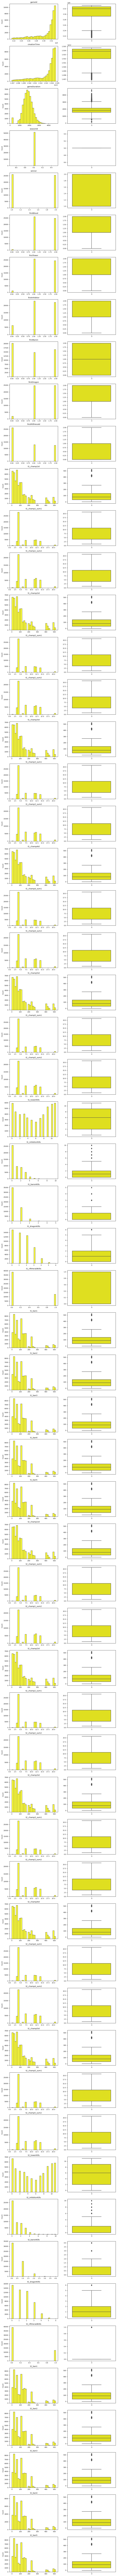

In [189]:
import seaborn as sns

fig, axes = plt.subplots(dataset.shape[1], 2, figsize=(10, dataset.shape[1] * 4))

for i in range(dataset.shape[1]):
    sns.histplot(x=dataset.values[:,i], color='yellow', ax=axes[i, 0], bins=30)
    sns.boxplot(data=dataset.values[:,i], color='yellow', ax=axes[i, 1])
    axes[i,0].set_title(dataset.columns.values[i])

plt.show()

## Preprocessament de dades

Com a pas previ a la selecció de model, es durà a terme un preprocessament de les dades del dataset en qüestió. Aquest preprocessament es divideix en quatre passos:
<ul>
    <li>Mostreig de dades (massa dades, duplicades, poques...).</li>
    <li>Conversió de dades (dades numèriques, categòriques, ordinals).</li>
    <li>Neteja de dades (dades errònies, perdudes, outliers...).</li>
    <li>Normalització/Estandardització de dades.</li>
</ul>

### Mostreig de dades

Comencem comprovant si hi han massa mostres pel nostre dataset. En el cas dels atributs observem si existeix algun cas concret on els valors de les mostres són constants.

In [190]:
def constant(df):
    df_np = df.to_numpy()
    return (df_np[0] == df_np).all()

atributs = []
for i in range(dataset.shape[1]):
    constants = constant(dataset[dataset.columns.values[i]])
    if (constants):
        atributs.append(dataset.columns.values[i])

print('Atributs on els valors de les mostres son constants:', atributs)

Atributs on els valors de les mostres son constants: ['seasonId']


Si observem els valors de la matriu de correlació anterior, veurem que la fila i la columna corresponent a l'atribut `seasonId` conté valors nuls. Això vol dir que en efecte els valors d'aquesta columna són constants, ja que la desviació estàndard serà igual a 0 i també ho serà el denominador de la fracció amb la qual s'obté el coeficient de correlació.

In [191]:
dataset.corr().head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
gameId,1.000000,0.999866,-0.003505,NaN,0.015197,0.017101,0.012554,0.008475,0.013382,0.005571,...,0.010252,0.010636,0.014530,-0.002018,-0.017837,-0.036884,-0.038103,-0.037254,-0.042139,-0.045027
creationTime,0.999866,1.000000,-0.003470,NaN,0.015357,0.017157,0.012628,0.008557,0.013397,0.005547,...,0.010383,0.010798,0.014582,-0.002007,-0.017664,-0.036671,-0.038080,-0.037110,-0.042094,-0.044954
gameDuration,-0.003505,-0.003470,1.000000,NaN,0.024187,0.105022,0.216842,0.379996,0.487788,0.255563,...,0.396769,0.319451,0.429793,0.416995,0.007818,0.004853,-0.001518,0.009548,0.009976,0.008206
seasonId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winner,0.015197,0.015357,0.024187,NaN,1.000000,0.174770,0.375697,0.536437,0.261888,0.310386,...,0.785813,0.660452,0.399249,0.497206,0.226102,-0.003714,0.000322,0.000046,-0.003010,-0.002691


Com que no tindrà cap impacte sobre el model, llavors podem eliminar la columna `seasonId`.

In [192]:
dataset = dataset.drop(atributs[0], axis=1)

Tot seguit comprovem si existeixen mostres duplicades.

In [193]:
mostres = []
duplicades = dataset.duplicated().values
for i in range(duplicades.shape[0]):
    if (duplicades[i]):
        mostres.append(i)

print('Índexs de mostres duplicades:', mostres)

Índexs de mostres duplicades: [1133, 2194, 2713, 3755, 4365, 4541, 4620, 5809, 5933, 6591, 6810, 6951, 7398, 7435, 7607, 8058, 8219, 8239, 8628, 8949, 9111, 9349, 9420, 9770, 9844, 9908, 10146, 10286, 10404, 10434, 10747, 10990, 11219, 12104, 12301, 12788, 12789, 12923, 13086, 13238, 13249, 13311, 13320, 13510, 13640, 14272, 14671, 15020, 15093, 15111, 15241, 15703, 15751, 16095, 16106, 16201, 16267, 16704, 17222, 17556, 17566, 17907, 18241, 18404, 18433, 18676, 18705, 18757, 18845, 19253, 19788, 19822, 19994, 20411, 20521, 20575, 20606, 20942, 21213, 21344, 21640, 21709, 21766, 21930, 21997, 22003, 22101, 22497, 22524, 22742, 22922, 23033, 23107, 23283, 23362, 23752, 23755, 23815, 23939, 24146, 24259, 24320, 24422, 24597, 24940, 25014, 25044, 25070, 25556, 25721, 25891, 26075, 26130, 26285, 26436, 26515, 26524, 26551, 26662, 26890, 26917, 27001, 27157, 27158, 27393, 27437, 27458, 27504, 27716, 27803, 27857, 27918, 27948, 28208, 28303, 28477, 28497, 28606, 28666, 28781, 28824, 28938, 2

Eliminem aquestes mostres duplicades mitjançant la funció `drop_duplicates()`.

In [194]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(51053, 60)

Veiem que el nombre de mostres s'ha reduït un 0,85% (de 51490 a 51053) respecte al dataset original.

### Conversió de dades

El següent pas es tracta de trobar dades que necessitin ser tractades mitjançant una conversió. En el cas d'aquest dataset el tipus de totes les dades es `int64`, llavors podem dir que aquestes són numèriques (en el cas d'atributs categòrics/ordinals aquesta conversió s'ha dut a terme prèviament al Kaggle de l'autor original).

### Neteja de dades

Abans de definir un model cal netejar les dades del dataset, és a dir, tractar aquells valors que son incorrectes, que s'han perdut o bé que es troben fóra de rang (outliers). Fixem-nos en els valors de cada atribut per a cada mostra. Alguns d'aquests atributs tenen un rang de valors atribuït (categòrics) especificat en la descripció del Kaggle. A sota comprovem quants valors únics té cada atribut.

In [195]:
print('Valors únics per atribut:')
for columna in dataset:
    print(columna, ':', dataset[columna].unique())

Valors únics per atribut:
gameId : [3326086514 3229566029 3327363504 ... 3322765040 3256675373 3317333020]
creationTime : [1504279457970 1497848803862 1504360103310 ... 1504029863961 1499562036246
 1503612754059]
gameDuration : [1949 1851 1493 ... 3373  585 3304]
winner : [1 2]
firstBlood : [2 1 0]
firstTower : [1 2 0]
firstInhibitor : [1 0 2]
firstBaron : [1 0 2]
firstDragon : [1 2 0]
firstRiftHerald : [2 1 0]
t1_champ1id : [  8 119  18  57  19  40  74 150 111 427  99  22  79 143  23  67 114 222
 421 134 238  96 122 498  41  78 412 497  24 157  25  35 240  43  92  85
 126  63  69  10  11  21 420  61  75 141 245 103 105  59 254   5  15  45
 106  81 131 236 201  48   9  31 117   4  64  28  82 101 268  27  62  53
 432 115  86 516  54 163   3 110  13  37  29  38 266  33  90 121   1  80
 120 113  16 267  12 161  17  34 107  51  76  42  58 202   7  60  91  89
  44   2   6  83 203 102 127  39 164  98  55  84  30 104 133  26  77 223
  32 429 112  36  14 154  68  20  50  72  56 136]
t1_champ1_

Segons la informació anterior, `winner` pren valors binaris entre 0 i 1 mentre que `firstBaron`, `firstDragon`, `firstTower`, `firstBlood`, `firstInhibitor` i `firstRiftHerald` prenen valors del 0 al 2.

Gràcies als boxplots anteriors podem afirmar que hi han outliers en alguns atributs del dataset. Molts d'aquests, però, no estan considerats com a errors d'inserció de dades i per tant encara no podem determinar quin impacte tindrà en l'anàlisi de resultats de les prediccions, així que de moment es mantindrà el dataset amb outliers.

In [180]:
# NO EXECUTAR!!!

from matplotlib.cbook import boxplot_stats

for columna in dataset:
    outliers = boxplot_stats(dataset[columna])[0]['fliers']
    for outlier in outliers:
        dataset.drop(dataset[dataset[columna] == outlier].index, inplace = True)
    #print(outliers)

### Normalització/Estandardització de dades

L'últim pas es centra en la normalització o estandardització de les dades. El fet de tenir diferents tipus de dades i valors entre diferents atributs es important sobre com de eficient esdevindrà el nostre model. De moment no s'aplicarà encara donat que no hem definit els conjunts de train i test.

## Selecció del model

## Entrenament i proves de models

## Avaluació de models

https://stackoverflow.com/questions/59209830/will-removing-a-column-having-same-values-for-all-observations-affect-my-model#:~:text=If%20one%20of%20your%20column%20in%20the%20dataset,model%20by%20creating%20a%20bias%20in%20the%20data.
https://stackoverflow.com/questions/22655667/dataframe-correlation-produces-nan-although-its-values-are-all-integers
https://stackoverflow.com/questions/53735603/extract-outliers-from-seaborn-boxplot
https://www.statology.org/remove-outliers/
https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02